In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 
# import kfold
from sklearn.model_selection import KFold
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# import Pipeline
from sklearn.pipeline import Pipeline
# import Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Use Sentiment Analysis as a single column

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame with a 'text' column
data = {'text': ['This is an example.', 'Another example here.', 'One more for demonstration.'],
        'sa': [100, 200, 300]}

df = pd.DataFrame(data)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column
text_vectors = tfidf_vectorizer.fit_transform(df['text'])
print(text_vectors)
# Add 'sa' to the text vectors
text_vectors = text_vectors + df['sa'].values.reshape(-1, 1)

# Print the updated text vectors
print(text_vectors)



  (0, 3)	0.4020402441612698
  (0, 0)	0.5286346066596935
  (0, 6)	0.5286346066596935
  (0, 9)	0.5286346066596935
  (1, 5)	0.6227660078332259
  (1, 1)	0.6227660078332259
  (1, 3)	0.4736296010332684
  (2, 2)	0.5
  (2, 4)	0.5
  (2, 7)	0.5
  (2, 8)	0.5
[[100.52863461 100.         100.         100.40204024 100.
  100.         100.52863461 100.         100.         100.52863461]
 [200.         200.62276601 200.         200.4736296  200.
  200.62276601 200.         200.         200.         200.        ]
 [300.         300.         300.5        300.         300.5
  300.         300.         300.5        300.5        300.        ]]


In [44]:

def train_predict_model(fpath, classifier, vectorizer, confusion_mtx = False):
    # build model
    df = pd.read_csv(fpath)
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['category'])
    #columns_to_add_sa = df.columns.drop(['label', 'category', 'text', 'sa'])
    #df[columns_to_add_sa] = df[columns_to_add_sa]*(1+df['sa'].values.reshape(-1,1))                          
    train, test, y_train, y_test = train_test_split(df[['text', 'sa']], df.label, test_size=0.2, random_state=42)
    X_train = vectorizer.fit_transform(train['text'])
    X_train = X_train + train['sa'].values.reshape(-1, 1)
    classifier.fit(X_train, y_train)
    # predict using model
    X_test = vectorizer.transform(test['text'])
    X_test = X_test + test['sa'].values.reshape(-1, 1)
    
    predictions = classifier.predict(X_test) 
    if confusion_mtx:
        plot_confusion_matrix(y_test, predictions, le)
    accuracy = metrics.accuracy_score(y_test, predictions)
    return accuracy, metrics.classification_report(y_test, predictions, target_names=le.classes_)

def plot_confusion_matrix(y_true, y_pred, le):
    #y_true = le.inverse_transform(y_true)
    #y_pred = le.inverse_transform(y_pred)

    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.tight_layout()
    plt.xlabel('True class')
    plt.ylabel('Predicted class')
    classes = le.classes_
    plt.xticks(range(10), classes, rotation=90)
    plt.yticks(range(10), classes, rotation=0)
    plt.tight_layout()
    plt.show()

In [23]:
model = LogisticRegression()
fpath = './data/df_10_category_balance_pca.csv'
accuracy, report = train_predict_model(fpath, model, confusion_mtx = True)
print(report)

KeyboardInterrupt: 

Reading file ./data/df_10_category_balance_3k_pca.csv ...
LogisticRegression:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is 

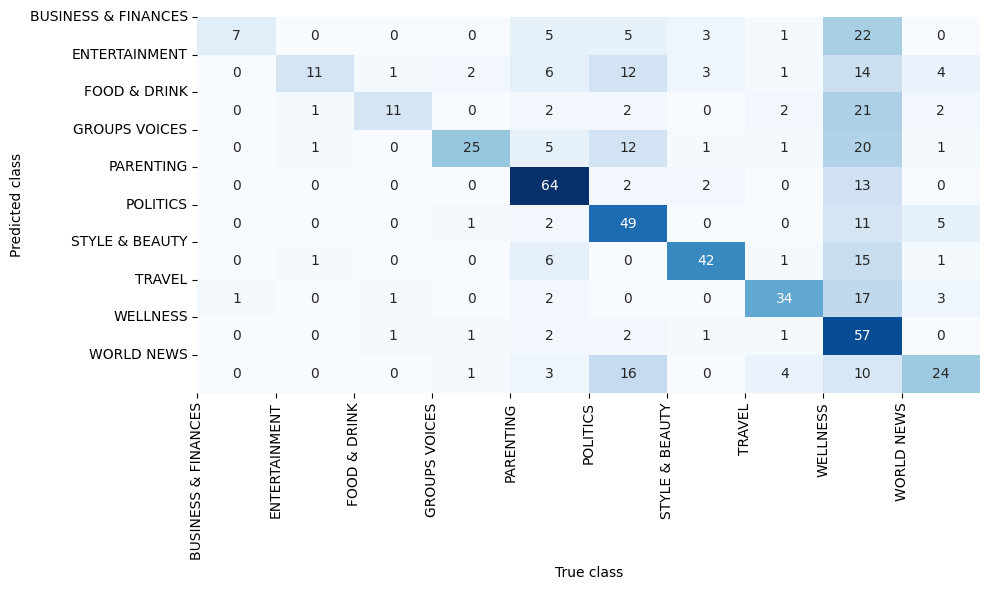

XGBClassifier:


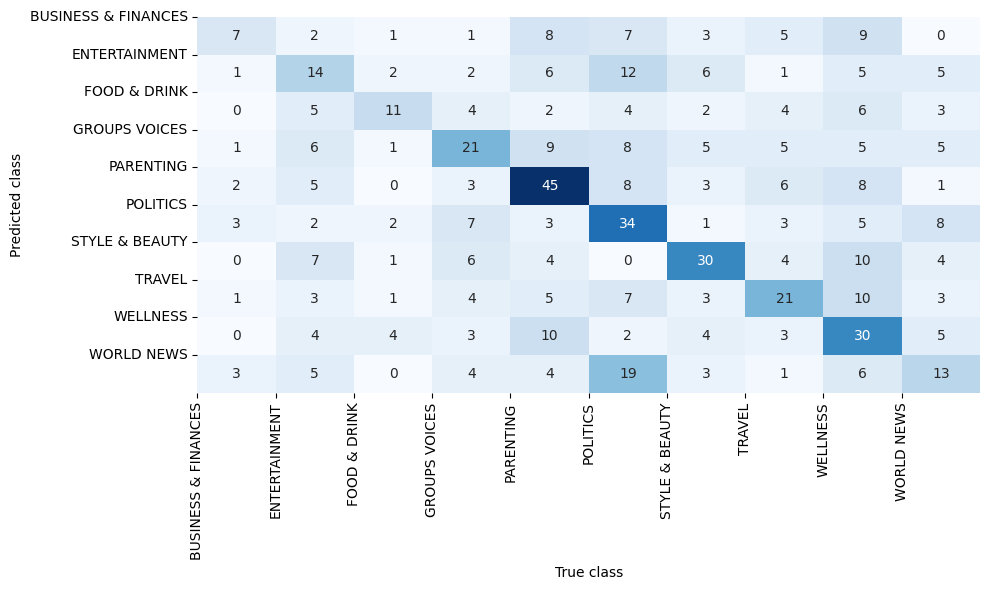

LinearSVC:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


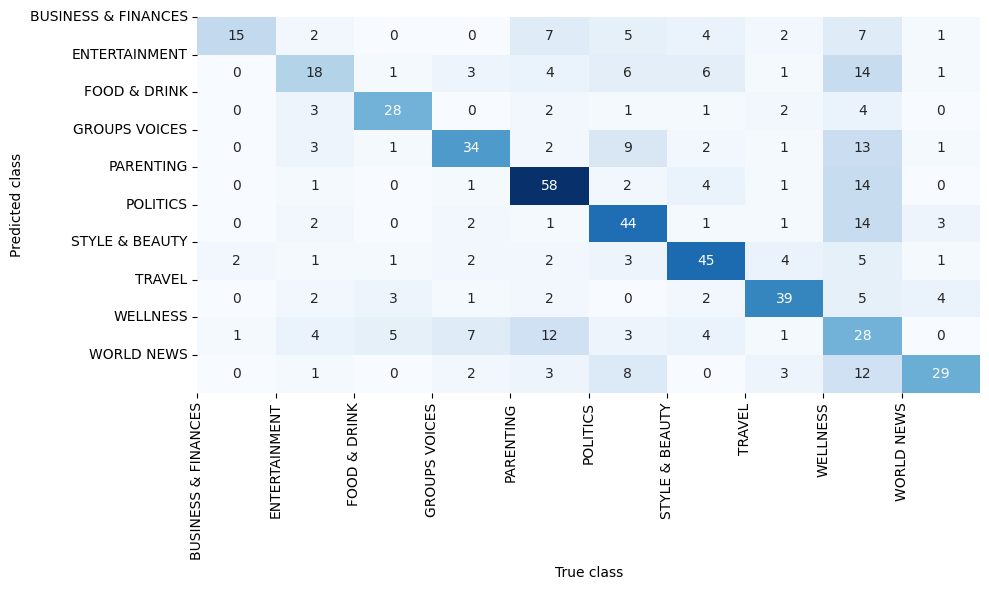

RidgeClassifier:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


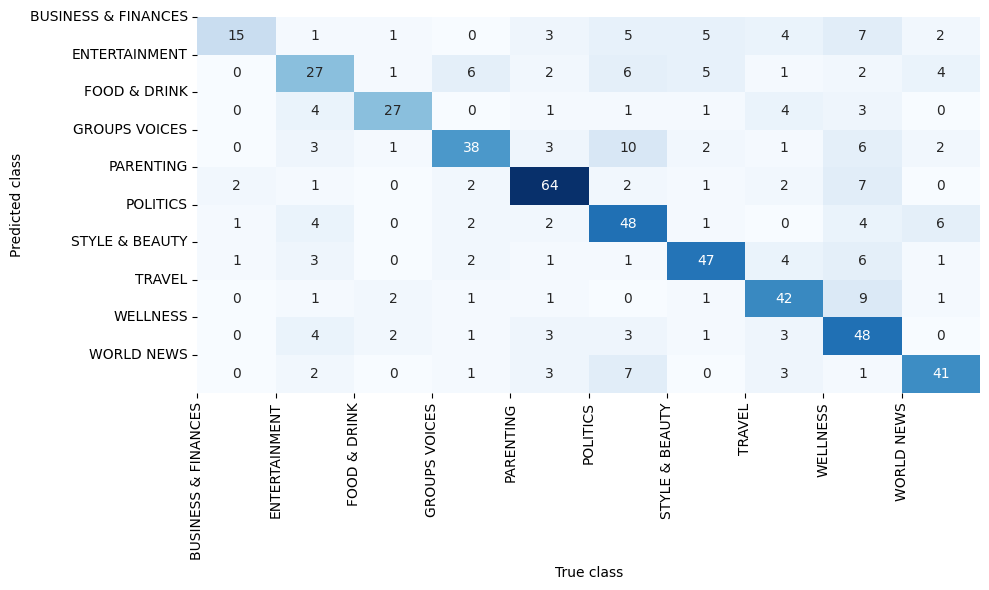

Reading file ./data/df_10_category_balance_10k_pca.csv ...
LogisticRegression:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is 

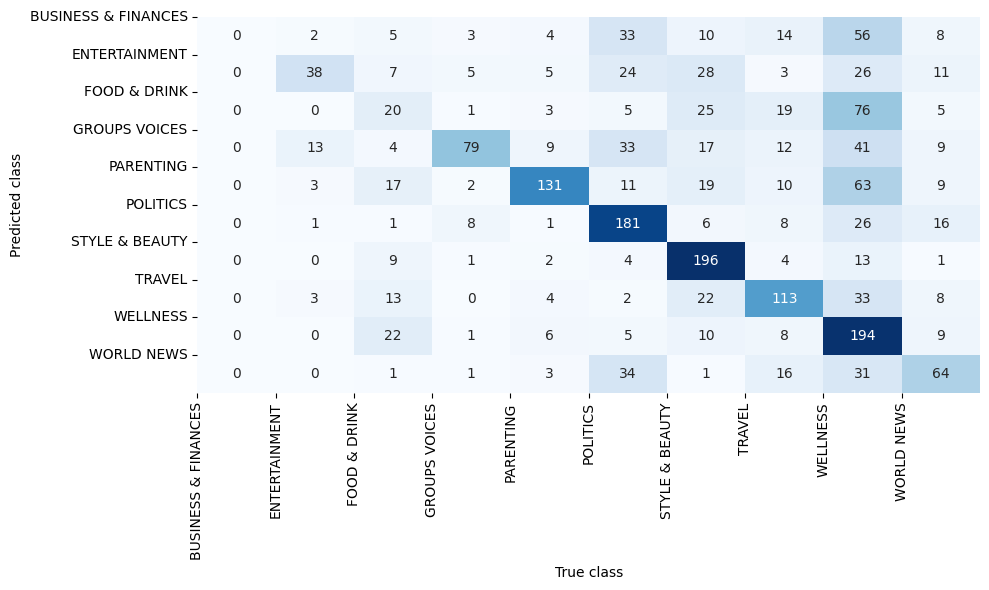

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier:


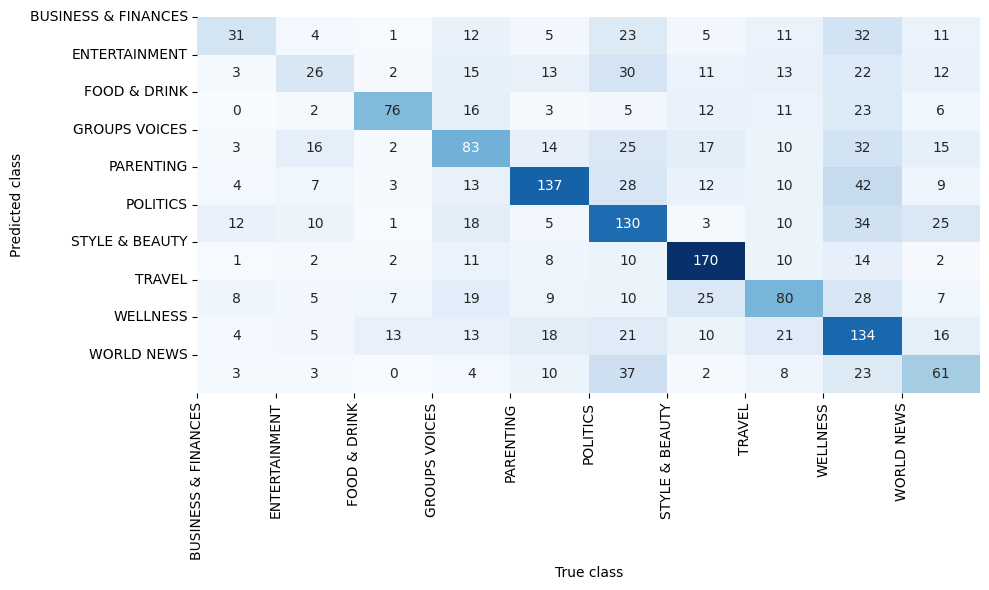

LinearSVC:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


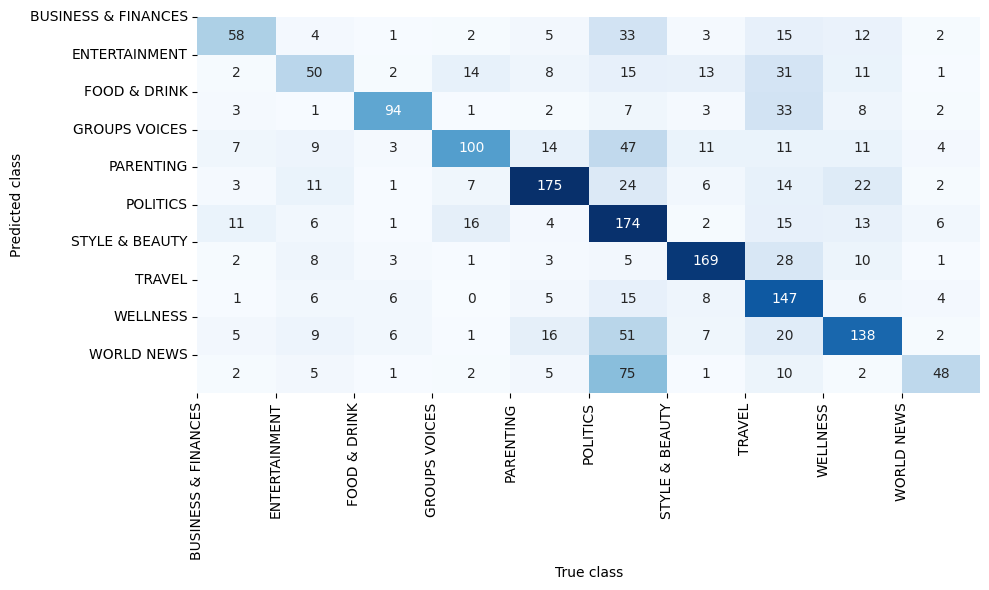

RidgeClassifier:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


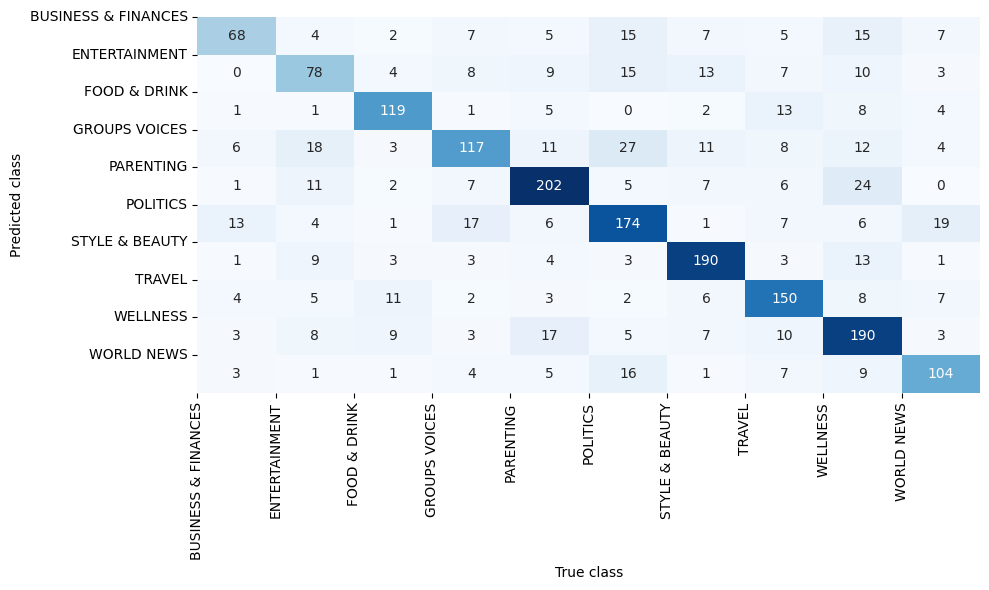

Reading file ./data/df_10_category_balance_30k_pca.csv ...
LogisticRegression:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is 

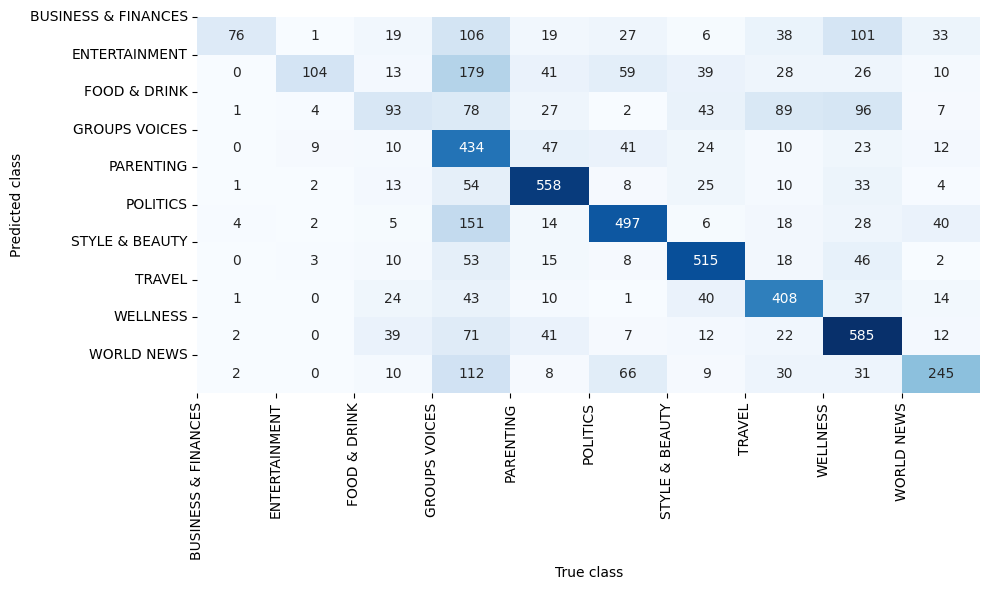

XGBClassifier:


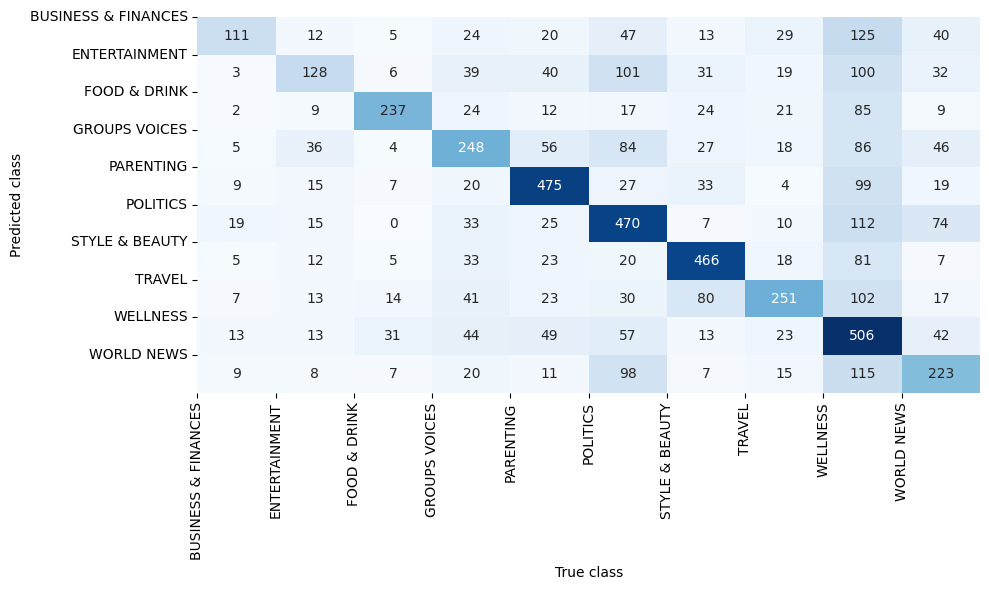

LinearSVC:


/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [45]:
fpaths = [
          #'./data/df_all_category_nobalance.csv', # kernel died
          #'./data/df_10_category_nobalance.csv', # kernel died
          './data/df_10_category_balance_pca.csv',
          './data/df_10_category_balance_60k_pca.csv',
          './data/df_10_category_balance_30k_pca.csv',
          './data/df_10_category_balance_10k_pca.csv',
          './data/df_10_category_balance_3k_pca.csv']
fpaths = fpaths[::-1]
names = ['3k', '10k', '30k', '60k', '100k']

models = [LogisticRegression(), XGBClassifier(), LinearSVC(), RidgeClassifier()]
accuracy_list = {}
report_list = {}
for i, file in enumerate(fpaths):
    print(f'Reading file {file} ...')
    accuracy_list[names[i]] = {}
    report_list[names[i]] = {}
    for model in models:
        # print the model name
        vectorizer = TfidfVectorizer(
            max_df=0.8,  # Ignore terms that appear in more than 80% of documents
            min_df=2,    # Ignore terms that appear in fewer than 2 documents
            ngram_range=(1,2)  # Use both unigrams and bigrams
        )
        model_name = str(model).split("(")[0]
        print(f'{model_name}:')
        accuracy, report = train_predict_model(file, model, vectorizer, confusion_mtx = True)
        accuracy_list[names[i]][model_name] = accuracy
        report_list[names[i]][model_name] = report

In [17]:
models_names = ['LogisticRegression', 'XGBClassifier', 'LinearSVC', 'RidgeClassifier']

In [ ]:
acc_lr_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LogisticRegression'], accuracy_list['10k']['LogisticRegression'], accuracy_list['30k']['LogisticRegression'], accuracy_list['60k']['LogisticRegression'], accuracy_list['100k']['LogisticRegression']]))
acc_xgb_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['XGBClassifier'], accuracy_list['10k']['XGBClassifier'], accuracy_list['30k']['XGBClassifier'], accuracy_list['60k']['XGBClassifier'], accuracy_list['100k']['XGBClassifier']]))
acc_svc_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LinearSVC'], accuracy_list['10k']['LinearSVC'], accuracy_list['30k']['LinearSVC'], accuracy_list['60k']['LinearSVC'], accuracy_list['100k']['LinearSVC']]))
acc_ridge_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['RidgeClassifier'], accuracy_list['10k']['RidgeClassifier'], accuracy_list['30k']['RidgeClassifier'], accuracy_list['60k']['RidgeClassifier'], accuracy_list['100k']['RidgeClassifier']]))
#acc_mnb_list = list(map(lambda x:x*100, [accuracy_list['3k']['MultinomialNB'], accuracy_list['10k']['MultinomialNB'], accuracy_list['30k']['MultinomialNB'], accuracy_list['60k']['MultinomialNB'], accuracy_list['100k']['MultinomialNB']]))
acc_list_sa_vec = [acc_lr_list_sa, acc_xgb_list_sa, acc_svc_list_sa, acc_ridge_list_sa]

KeyError: 'LogisticRegression'

In [ ]:
plt.figure(figsize=(10, 3))
for i, acc in enumerate(acc_list_sa_vec):
    plt.plot(names, acc, label=models_names[i])
plt.legend()
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

In [ ]:
accuracy_list_no_sa = {'3k': {'LogisticRegression': 0.625,
  'XGBClassifier': 0.5683333333333334,
  'LinearSVC': 0.6516666666666666,
  'RidgeClassifier': 0.66,
  'MultinomialNB': 0.515},
 '10k': {'LogisticRegression': 0.6805,
  'XGBClassifier': 0.642,
  'LinearSVC': 0.6895,
  'RidgeClassifier': 0.6995,
  'MultinomialNB': 0.6255},
 '30k': {'LogisticRegression': 0.7393333333333333,
  'XGBClassifier': 0.7063333333333334,
  'LinearSVC': 0.7533333333333333,
  'RidgeClassifier': 0.7591666666666667,
  'MultinomialNB': 0.679},
 '60k': {'LogisticRegression': 0.7686666666666667,
  'XGBClassifier': 0.7228333333333333,
  'LinearSVC': 0.779,
  'RidgeClassifier': 0.782,
  'MultinomialNB': 0.7096666666666667},
 '100k': {'LogisticRegression': 0.7823863932801168,
  'XGBClassifier': 0.733239421923097,
  'LinearSVC': 0.7946470496165284,
  'RidgeClassifier': 0.7977774299577398,
  'MultinomialNB': 0.7272916992747952}}
acc_lr_list_no_sa = list(map(lambda x:x*100, [accuracy_list_no_sa['3k']['LogisticRegression'], accuracy_list_no_sa['10k']['LogisticRegression'], accuracy_list_no_sa['30k']['LogisticRegression'], accuracy_list_no_sa['60k']['LogisticRegression'], accuracy_list_no_sa['100k']['LogisticRegression']]))
acc_xgb_list_no_sa = list(map(lambda x:x*100, [accuracy_list_no_sa['3k']['XGBClassifier'], accuracy_list_no_sa['10k']['XGBClassifier'], accuracy_list_no_sa['30k']['XGBClassifier'], accuracy_list_no_sa['60k']['XGBClassifier'], accuracy_list_no_sa['100k']['XGBClassifier']]))
acc_svc_list_no_sa = list(map(lambda x:x*100, [accuracy_list_no_sa['3k']['LinearSVC'], accuracy_list_no_sa['10k']['LinearSVC'], accuracy_list_no_sa['30k']['LinearSVC'], accuracy_list_no_sa['60k']['LinearSVC'], accuracy_list_no_sa['100k']['LinearSVC']]))
acc_ridge_list_no_sa = list(map(lambda x:x*100, [accuracy_list_no_sa['3k']['RidgeClassifier'], accuracy_list_no_sa['10k']['RidgeClassifier'], accuracy_list_no_sa['30k']['RidgeClassifier'], accuracy_list_no_sa['60k']['RidgeClassifier'], accuracy_list_no_sa['100k']['RidgeClassifier']]))
#acc_mnb_list = list(map(lambda x:x*100, [accuracy_list['3k']['MultinomialNB'], accuracy_list['10k']['MultinomialNB'], accuracy_list['30k']['MultinomialNB'], accuracy_list['60k']['MultinomialNB'], accuracy_list['100k']['MultinomialNB']]))
acc_list_no_sa_vec = [acc_lr_list_no_sa, acc_xgb_list_no_sa, acc_svc_list_no_sa, acc_ridge_list_no_sa]

In [ ]:
plt.figure(figsize=(10, 3))
for i, acc in enumerate(acc_list_sa_vec):
    plt.plot(names, acc, label=models_names[i]+'sa')
for i, acc in enumerate(acc_list_no_sa_vec):
    plt.plot(names, acc, label=models_names[i], linestyle='--')
plt.legend()
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

In [33]:
acc_lr_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LogisticRegression'], accuracy_list['10k']['LogisticRegression'], accuracy_list['30k']['LogisticRegression'], accuracy_list['60k']['LogisticRegression'], accuracy_list['100k']['LogisticRegression']]))
acc_xgb_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['XGBClassifier'], accuracy_list['10k']['XGBClassifier'], accuracy_list['30k']['XGBClassifier'], accuracy_list['60k']['XGBClassifier'], accuracy_list['100k']['XGBClassifier']]))
acc_svc_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LinearSVC'], accuracy_list['10k']['LinearSVC'], accuracy_list['30k']['LinearSVC'], accuracy_list['60k']['LinearSVC'], accuracy_list['100k']['LinearSVC']]))
acc_ridge_list_sa = list(map(lambda x:x*100, [accuracy_list['3k']['RidgeClassifier'], accuracy_list['10k']['RidgeClassifier'], accuracy_list['30k']['RidgeClassifier'], accuracy_list['60k']['RidgeClassifier'], accuracy_list['100k']['RidgeClassifier']]))
#acc_mnb_list = list(map(lambda x:x*100, [accuracy_list['3k']['MultinomialNB'], accuracy_list['10k']['MultinomialNB'], accuracy_list['30k']['MultinomialNB'], accuracy_list['60k']['MultinomialNB'], accuracy_list['100k']['MultinomialNB']]))
acc_list_sa = [acc_lr_list_sa, acc_xgb_list_sa, acc_svc_list_sa, acc_ridge_list_sa]

In [26]:
acc_lr_list_no_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LogisticRegression'], accuracy_list['10k']['LogisticRegression'], accuracy_list['30k']['LogisticRegression'], accuracy_list['60k']['LogisticRegression'], accuracy_list['100k']['LogisticRegression']]))
acc_xgb_list_no_sa = list(map(lambda x:x*100, [accuracy_list['3k']['XGBClassifier'], accuracy_list['10k']['XGBClassifier'], accuracy_list['30k']['XGBClassifier'], accuracy_list['60k']['XGBClassifier'], accuracy_list['100k']['XGBClassifier']]))
acc_svc_list_no_sa = list(map(lambda x:x*100, [accuracy_list['3k']['LinearSVC'], accuracy_list['10k']['LinearSVC'], accuracy_list['30k']['LinearSVC'], accuracy_list['60k']['LinearSVC'], accuracy_list['100k']['LinearSVC']]))
acc_ridge_list_no_sa = list(map(lambda x:x*100, [accuracy_list['3k']['RidgeClassifier'], accuracy_list['10k']['RidgeClassifier'], accuracy_list['30k']['RidgeClassifier'], accuracy_list['60k']['RidgeClassifier'], accuracy_list['100k']['RidgeClassifier']]))
#acc_mnb_list = list(map(lambda x:x*100, [accuracy_list['3k']['MultinomialNB'], accuracy_list['10k']['MultinomialNB'], accuracy_list['30k']['MultinomialNB'], accuracy_list['60k']['MultinomialNB'], accuracy_list['100k']['MultinomialNB']]))
acc_list_no_sa = [acc_lr_list_no_sa, acc_xgb_list_no_sa, acc_svc_list_no_sa, acc_ridge_list_no_sa]

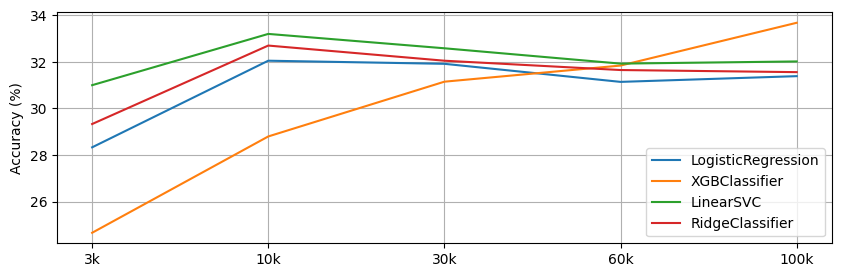

In [35]:
plt.figure(figsize=(10, 3))
for i, acc in enumerate(acc_list_sa):
    plt.plot(names, acc, label=models_names[i])
plt.legend()
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

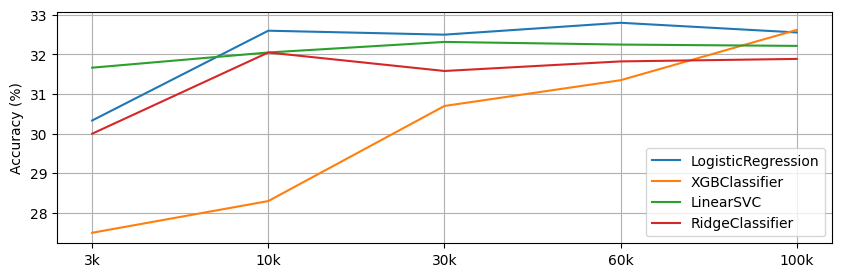

In [27]:
plt.figure(figsize=(10, 3))
for i, acc in enumerate(acc_list_no_sa):
    plt.plot(names, acc, label=models_names[i])
plt.legend()
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

In [20]:

acc_lr_list = list(map(lambda x:x*100, [accuracy_list['3k']['LogisticRegression'], accuracy_list['10k']['LogisticRegression'], accuracy_list['30k']['LogisticRegression'], accuracy_list['60k']['LogisticRegression'], accuracy_list['100k']['LogisticRegression']]))
acc_xgb_list = list(map(lambda x:x*100, [accuracy_list['3k']['XGBClassifier'], accuracy_list['10k']['XGBClassifier'], accuracy_list['30k']['XGBClassifier'], accuracy_list['60k']['XGBClassifier'], accuracy_list['100k']['XGBClassifier']]))
acc_svc_list = list(map(lambda x:x*100, [accuracy_list['3k']['LinearSVC'], accuracy_list['10k']['LinearSVC'], accuracy_list['30k']['LinearSVC'], accuracy_list['60k']['LinearSVC'], accuracy_list['100k']['LinearSVC']]))
acc_ridge_list = list(map(lambda x:x*100, [accuracy_list['3k']['RidgeClassifier'], accuracy_list['10k']['RidgeClassifier'], accuracy_list['30k']['RidgeClassifier'], accuracy_list['60k']['RidgeClassifier'], accuracy_list['100k']['RidgeClassifier']]))
#acc_mnb_list = list(map(lambda x:x*100, [accuracy_list['3k']['MultinomialNB'], accuracy_list['10k']['MultinomialNB'], accuracy_list['30k']['MultinomialNB'], accuracy_list['60k']['MultinomialNB'], accuracy_list['100k']['MultinomialNB']]))
acc_list = [acc_lr_list, acc_xgb_list, acc_svc_list, acc_ridge_list]

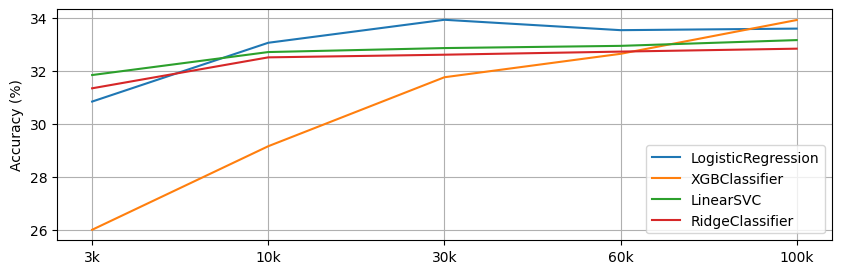

In [21]:
plt.figure(figsize=(10, 3))
for i, acc in enumerate(acc_list):
    plt.plot(names, acc, label=models_names[i])
for i, acc in enumerate(acc_list_no_sa):
    plt.plot(names, acc, label=models_names[i] + ' no sa')
plt.legend()
plt.ylabel('Accuracy (%)')
plt.grid()
plt.show()

In [9]:
accuracy_list

{'3k': {'LogisticRegression': 0.625,
  'XGBClassifier': 0.5683333333333334,
  'LinearSVC': 0.6516666666666666,
  'RidgeClassifier': 0.66,
  'MultinomialNB': 0.515},
 '10k': {'LogisticRegression': 0.6805,
  'XGBClassifier': 0.642,
  'LinearSVC': 0.6895,
  'RidgeClassifier': 0.6995,
  'MultinomialNB': 0.6255},
 '30k': {'LogisticRegression': 0.7393333333333333,
  'XGBClassifier': 0.7063333333333334,
  'LinearSVC': 0.7533333333333333,
  'RidgeClassifier': 0.7591666666666667,
  'MultinomialNB': 0.679},
 '60k': {'LogisticRegression': 0.7686666666666667,
  'XGBClassifier': 0.7228333333333333,
  'LinearSVC': 0.779,
  'RidgeClassifier': 0.782,
  'MultinomialNB': 0.7096666666666667},
 '100k': {'LogisticRegression': 0.7823863932801168,
  'XGBClassifier': 0.733239421923097,
  'LinearSVC': 0.7946470496165284,
  'RidgeClassifier': 0.7977774299577398,
  'MultinomialNB': 0.7272916992747952}}

In [30]:
#print(report_list['100k']['LogisticRegression'])
precision_100k_lr = [74, 74, 83, 77, 77, 77, 87, 82, 73, 81, 78]
precision_100k_xgb = [68, 68, 79, 76, 75, 74, 81, 78, 64, 74, 73]
precision_100k_svc = [74, 76, 84, 78, 78, 77, 87, 83, 76, 81, 79]
precision_100k_rc = [77, 76, 83, 79, 78, 78, 87, 83, 76, 81, 80]
precision_100k_mnb = [89, 89, 90, 71, 65, 67, 82, 83, 59, 87, 73]
classes = ['BUSINESS & FINANCES', 'ENTERTAINMENT', 'FOOD & DRINK', 'GROUPS VOICES', 'PARENTING', 'POLITICS', 'STYLE & BEAUTY', 'TRAVEL', 'WELLNESS', 'WORLD NEWS', 'avg_acc' ]

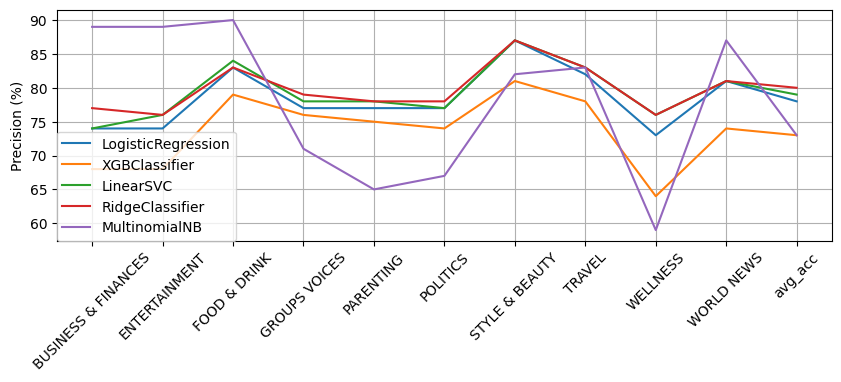

In [38]:
x = classes
plt.figure(figsize=(10, 3))
plt.plot(x, precision_100k_lr, label='LogisticRegression')
plt.plot(x, precision_100k_xgb, label='XGBClassifier')
plt.plot(x, precision_100k_svc, label='LinearSVC')
plt.plot(x, precision_100k_rc, label='RidgeClassifier')
plt.plot(x, precision_100k_mnb, label='MultinomialNB')
# make the legend outside the plot
plt.legend(loc='lower left', borderaxespad=0.)
plt.ylabel('Precision (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


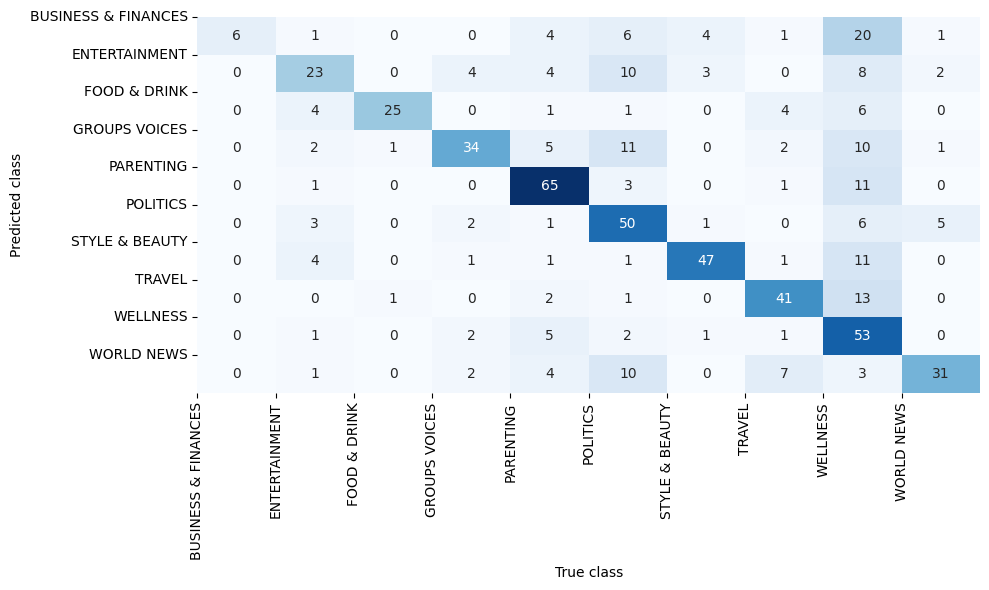

Classification Report:
['BUSINESS & FINANCES' 'ENTERTAINMENT' 'FOOD & DRINK' 'GROUPS VOICES'
 'PARENTING' 'POLITICS' 'STYLE & BEAUTY' 'TRAVEL' 'WELLNESS' 'WORLD NEWS']
                     precision    recall  f1-score   support

BUSINESS & FINANCES       1.00      0.14      0.24        43
      ENTERTAINMENT       0.57      0.43      0.49        54
       FOOD & DRINK       0.93      0.61      0.74        41
      GROUPS VOICES       0.76      0.52      0.61        66
          PARENTING       0.71      0.80      0.75        81
           POLITICS       0.53      0.74      0.61        68
     STYLE & BEAUTY       0.84      0.71      0.77        66
             TRAVEL       0.71      0.71      0.71        58
           WELLNESS       0.38      0.82      0.51        65
         WORLD NEWS       0.78      0.53      0.63        58

           accuracy                           0.62       600
          macro avg       0.72      0.60      0.61       600
       weighted avg       0.70      0

In [74]:
model = LogisticRegression()
vectorizer = TfidfVectorizer(
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    min_df=2,    # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1,2)  # Use both unigrams and bigrams
)
fpath = './data/df_10_category_balance_3k.csv'
accuracy, report = train_predict_model(fpath, model, vectorizer, confusion_mtx = True)
print(report)

In [40]:
df = pd.read_csv('./data/df_10_category_balance_3k_pca.csv')
df.head()

,category,text,sa
0,FOOD & DRINK,dessert recipe raisin lover hater steer clear ...,-0.3182
1,GROUPS VOICES,trump different response orlando vega massacre...,-0.3612
2,POLITICS,friday talking point double standard hypocrisy...,0.6597
3,FOOD & DRINK,postthanksgiving detox diet overindulging than...,0.1280
4,WELLNESS,6 quote encourage march march stress strain co...,0.0772


In [41]:
df['label'] = LabelEncoder().fit_transform(df['category'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.2, random_state=42)

In [45]:
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
#folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [46]:
X_train

<2400x11235 sparse matrix of type '<class 'numpy.float64'>'
	with 42512 stored elements in Compressed Sparse Row format>

In [64]:
NB = MultinomialNB()
Ridge = RidgeClassifier()
XGB = XGBClassifier(objective = 'multi:softprob')
def fit_model(clf , name):
    pipe = Pipeline([
    ('vectorize', vect),
    (name, clf)])
    result = cross_validate(pipe, X_train, y_train, cv = folds, return_train_score=True,scoring = ('accuracy', 
                                                                                       'f1_weighted', 
                                                                                       'precision_weighted', 
                                                                                       'recall_weighted'))
    return result

In [66]:
bayes = fit_model(NB, 'NB')
ridge = fit_model(Ridge, 'Ridge')
xgb = fit_model(XGB, 'XGB')
b = pd.DataFrame.from_dict(bayes)
b['model'] = ["NB","NB","NB","NB","NB"]
r = pd.DataFrame.from_dict(ridge)
r['model'] = ["Ridge","Ridge","Ridge","Ridge","Ridge"]
x = pd.DataFrame.from_dict(xgb)
x['model'] = ["XGB","XGB","XGB","XGB","XGB"]

results = pd.concat([b,r,x])

/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yaoyao/miniconda3/envs/tf/lib/pyt

In [1]:
results.head()

NameError: name 'results' is not defined

In [68]:
models_eval = results.groupby("model")

In [ ]:
models_eval.head()

In [69]:
means = models_eval.mean()
sd = models_eval.std()

In [70]:
means.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
model,,,,,,,,,,
NB,0.030369,0.007162,0.469167,0.853125,0.419511,0.845305,0.643821,0.893990,0.469167,0.853125
Ridge,0.044050,0.006267,0.642083,0.999062,0.635629,0.999062,0.648109,0.999066,0.642083,0.999062
XGB,7.968129,0.016810,0.529583,0.989479,0.525260,0.989475,0.533682,0.989589,0.529583,0.989479


In [71]:
sd.head()

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
model,,,,,,,,,,
NB,0.003567,0.001466,0.019510,0.006163,0.017991,0.006003,0.048851,0.002748,0.019510,0.006163
Ridge,0.004334,0.002107,0.024887,0.000436,0.026785,0.000436,0.029919,0.000434,0.024887,0.000436
XGB,2.078235,0.004658,0.019060,0.002481,0.018926,0.002494,0.018973,0.002447,0.019060,0.002481


In [72]:
# def get_metrics(true_labels, predicted_labels):
    
#     print('Accuracy:', np.round(
#                         metrics.accuracy_score(true_labels, 
#                                                predicted_labels),
#                         4))
#     print('Precision:', np.round(
#                         metrics.precision_score(true_labels, 
#                                                predicted_labels,
#                                                average='weighted'),
#                         4))
#     print('Recall:', np.round(
#                         metrics.recall_score(true_labels, 
#                                                predicted_labels,
#                                                average='weighted'),
#                         4))
#     print('F1 Score:', np.round(
#                         metrics.f1_score(true_labels, 
#                                                predicted_labels,
#                                                average='weighted'),
#                         4))
                        

# def train_predict_model(classifier, 
#                         train_features, train_labels, 
#                         test_features, test_labels):
#     # build model    
#     classifier.fit(train_features, train_labels)
#     # predict using model
#     predictions = classifier.predict(test_features) 
#     return predictions    


# def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
#     total_classes = len(classes)
#     level_labels = [total_classes*[0], list(range(total_classes))]

#     cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
#                                   labels=classes)
#     cm_frame = pd.DataFrame(data=cm, 
#                             columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
#                                                   labels=level_labels), 
#                             index=pd.MultiIndex(levels=[['Actual:'], classes], 
#                                                 labels=level_labels)) 
#     print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
# def model_perf(classes, true_labels, predicted_labels):
#     print('Model Performance metrics:')
#     print('-'*30)
#     get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
#     print('\nModel Classification report:')
#     print('-'*30)
#     display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
#                                   classes=classes)
#     print('\nPrediction Confusion Matrix:')
#     print('-'*30)
#     display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
#                              classes=classes)

In [77]:
#y_pred_nb = train_predict_model(classifier=NB, train_features=vect.fit_transform(X_train), train_labels=y_train, test_features=vect.transform(X_test), test_labels=y_test)

y_pred_nb = NB.predict(vect.transform(X_test))

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
display_classification_report(true_labels=y_test, predicted_labels=y_pred_nb, classes=sorted(y_train.unique()))

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       1.00      0.07      0.14        54
           2       1.00      0.12      0.22        41
           3       0.86      0.29      0.43        66
           4       0.44      0.84      0.58        81
           5       0.49      0.74      0.59        68
           6       0.92      0.68      0.78        66
           7       0.79      0.40      0.53        58
           8       0.24      0.82      0.37        65
           9       0.94      0.28      0.43        58

    accuracy                           0.47       600
   macro avg       0.77      0.43      0.41       600
weighted avg       0.74      0.47      0.44       600



In [ ]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, class_names):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.tight_layout()
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks(range(10), class_names, rotation=0)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


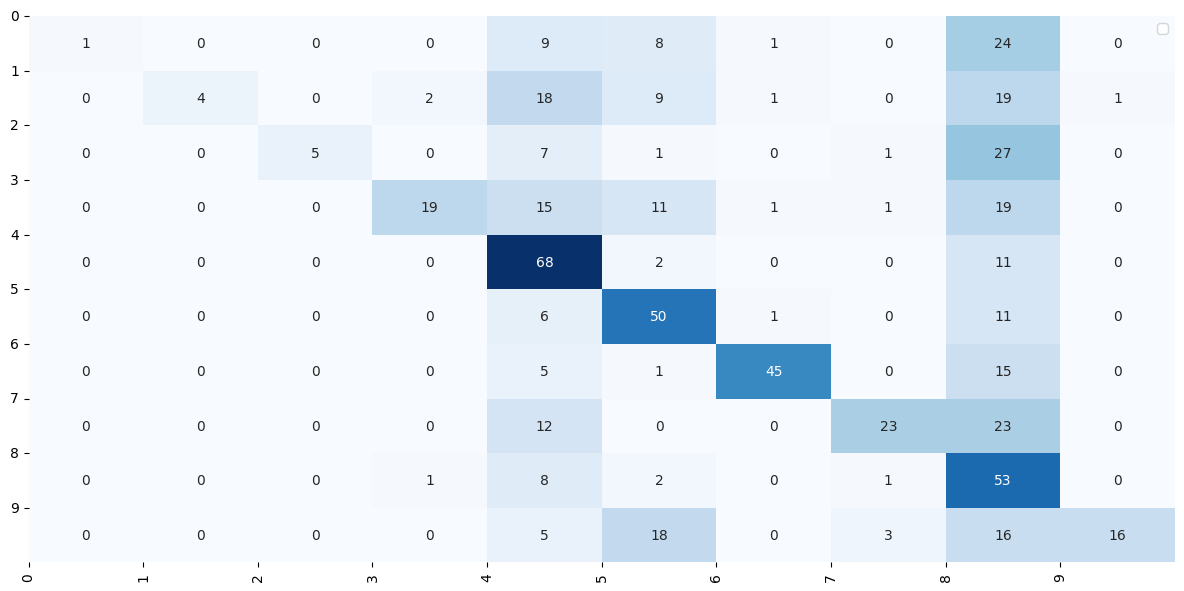

In [ ]:
plot_confusion_matrix(y_test, y_pred_nb, class_names=sorted(y_train.unique()))